In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
user_df = pd.read_csv('./data/user_profile.csv')

In [3]:
user_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2.0,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4.0,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5.0,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
user_df.shape

(33969, 15)

In [5]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.396900e+04,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000,33969.000000
mean,1.066144e+06,5.511054,3.487238,2.308134,3.620448,1.003120,3.043510,0.001766,5.078483,4.743413,0.462422,1.018664,2.270305,0.315876,0.984957
std,4.989261e+05,7.606525,4.225699,3.838763,4.756901,2.352951,4.621023,0.072774,5.229548,7.211016,1.054680,2.341528,4.307223,1.362978,1.949154
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.821030e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.044530e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.453492e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103165e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [6]:
feature_names = list(user_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [7]:
scaler = StandardScaler()
user_df[feature_names] = scaler.fit_transform(user_df[feature_names])

In [8]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04,3.396900e+04
mean,1.066144e+06,-1.673391e-18,5.062008e-17,-3.890634e-17,-3.179443e-17,-6.944573e-17,6.860903e-17,-5.438521e-18,3.514121e-17,2.844765e-17,-3.681460e-17,3.221278e-17,-2.133574e-17,-3.890634e-17,-2.844765e-17
std,4.989261e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.245273e-01,-8.252575e-01,-6.012792e-01,-7.611051e-01,-4.263307e-01,-6.586323e-01,-2.427177e-02,-9.711275e-01,-6.578106e-01,-4.384539e-01,-4.350489e-01,-5.271004e-01,-2.317579e-01,-5.053327e-01
25%,6.821030e+05,-7.245273e-01,-8.252575e-01,-6.012792e-01,-7.611051e-01,-4.263307e-01,-6.586323e-01,-2.427177e-02,-9.711275e-01,-6.578106e-01,-4.384539e-01,-4.350489e-01,-5.271004e-01,-2.317579e-01,-5.053327e-01
50%,1.044530e+06,-3.301233e-01,-1.153053e-01,-6.012792e-01,-1.304331e-01,-4.263307e-01,-6.586323e-01,-2.427177e-02,-3.974557e-01,-3.804531e-01,-4.384539e-01,-4.350489e-01,-5.271004e-01,-2.317579e-01,-5.053327e-01
75%,1.453492e+06,4.586848e-01,5.946468e-01,1.802342e-01,5.002389e-01,-4.263307e-01,-9.415859e-03,-2.427177e-02,7.498878e-01,1.742619e-01,-4.384539e-01,-4.350489e-01,1.694144e-01,-2.317579e-01,5.207684e-01
max,2.103165e+06,7.557957e+00,3.434455e+00,9.297890e+00,9.329647e+00,5.948737e+00,7.781182e+00,4.120012e+01,5.148038e+00,6.830842e+00,5.250561e+00,7.252352e+00,1.201016e+01,1.077372e+01,5.651274e+00


In [9]:
user = user_df.iloc[-1,1:]

In [10]:
features = user_df.loc[:,user_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.111809,2.487853,0.961748,8.278527,0.848683,6.482749,-0.024272,4.574366,5.028018,1.457884,7.252352,7.366733,6.371528,2.572971
1,4.534193,-0.351956,0.440739,5.125167,-0.426331,2.371044,-0.024272,2.853351,2.670479,-0.438454,2.127418,0.865929,-0.231758,0.520768
2,2.430705,1.067948,4.087801,4.284271,-0.426331,5.833532,-0.024272,3.235799,1.283692,1.457884,5.544041,5.509361,2.703036,2.572971
3,-0.461591,-0.825257,-0.601279,-0.340657,-0.426331,-0.658632,-0.024272,-0.971128,-0.380453,-0.438454,-0.435049,-0.527100,-0.231758,-0.505333
4,0.064281,-0.825257,-0.601279,0.079791,-0.426331,-0.658632,-0.024272,-0.971128,0.174262,-0.438454,0.419107,-0.527100,-0.231758,-0.505333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33964,-0.724527,-0.825257,-0.601279,-0.130433,-0.426331,0.639801,-0.024272,-0.397456,-0.657811,-0.438454,-0.435049,-0.527100,-0.231758,-0.505333
33965,-0.724527,-0.825257,-0.601279,-0.761105,0.848683,-0.009416,-0.024272,-0.971128,-0.657811,2.406053,-0.435049,0.169414,-0.231758,-0.505333
33966,-0.724527,-0.825257,-0.601279,-0.761105,0.848683,-0.009416,-0.024272,-0.971128,-0.657811,2.406053,-0.435049,0.169414,-0.231758,-0.505333
33967,-0.724527,-0.825257,-0.601279,-0.761105,0.848683,-0.009416,-0.024272,-0.971128,-0.657811,2.406053,-0.435049,0.169414,-0.231758,-0.505333


In [11]:
user_ids = user_df.loc[:,user_df.columns=='user']
user_ids

,user
0,2.0
1,4.0
2,5.0
3,7.0
4,8.0
...,...
33964,2103161.0
33965,2103162.0
33966,2103163.0
33967,2103164.0


In [12]:
s = []
for k in range(1,30):
    km = KMeans(n_init='auto',n_clusters=k)
    km.fit_predict(features)
    s.append(km.inertia_)


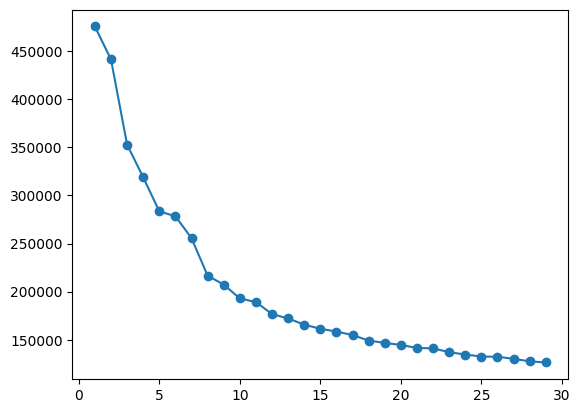

In [13]:
plt.plot(list(range(1,30)),s)
plt.scatter(list(range(1,30)),s)

In [14]:
cluster_labels = [None] * len(user_ids)

In [15]:
features.iloc[0,:]

Database           6.111809
Python             2.487853
CloudComputing     0.961748
DataAnalysis       8.278527
Containers         0.848683
MachineLearning    6.482749
ComputerVision    -0.024272
DataScience        4.574366
BigData            5.028018
Chatbot            1.457884
R                  7.252352
BackendDev         7.366733
FrontendDev        6.371528
Blockchain         2.572971
Name: 0, dtype: float64

In [16]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(features)
cluster_labels = model.labels_
model.labels_

array([19, 10, 19, ..., 16, 16, 16])

In [17]:
def combine_cluster_labels(user_ids,labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids,labels_df,left_index=True,right_index=True)
    cluster_df.columns = ['user','cluster']
    return cluster_df

In [18]:
cluster_df = combine_cluster_labels(user_ids,cluster_labels)
cluster_df.head(50)

,user,cluster
0,2.0,19
1,4.0,10
2,5.0,19
3,7.0,18
4,8.0,14
5,9.0,7
6,12.0,6
7,16.0,5
8,17.0,18
9,19.0,18
